In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats

In [27]:
# Load Data
df = pd.read_csv("true_car_listings.csv")
print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
df.head()

Dataset loaded: 852,122 rows, 8 columns


,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [28]:
# Data Overview
print("=== DATA INFO ===")
df.info()
print("\n=== STATISTICAL SUMMARY ===")
df.describe()

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB

=== STATISTICAL SUMMARY ===


,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [29]:
# Check Missing Values & Duplicates
print("Missing Values:")
print(df.isnull().sum())
print(f"\nDuplicates: {df.duplicated().sum()}")

Missing Values:
Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64
Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

Duplicates: 30

Duplicates: 30


In [30]:
# Clean Data: Remove Duplicates & Outliers
# Remove duplicates
df = df.drop_duplicates()

# Remove extreme outliers
df = df[(df['Price'] >= 1500) & (df['Price'] <= 150000) & (df['Mileage'] <= 300000)]

print(f"Cleaned dataset: {df.shape[0]:,} rows")
print(f"Price range: ${df['Price'].min():,} - ${df['Price'].max():,}")
print(f"Year range: {df['Year'].min()} - {df['Year'].max()}")

Cleaned dataset: 851,040 rows
Price range: $1,500 - $150,000
Year range: 1997 - 2018


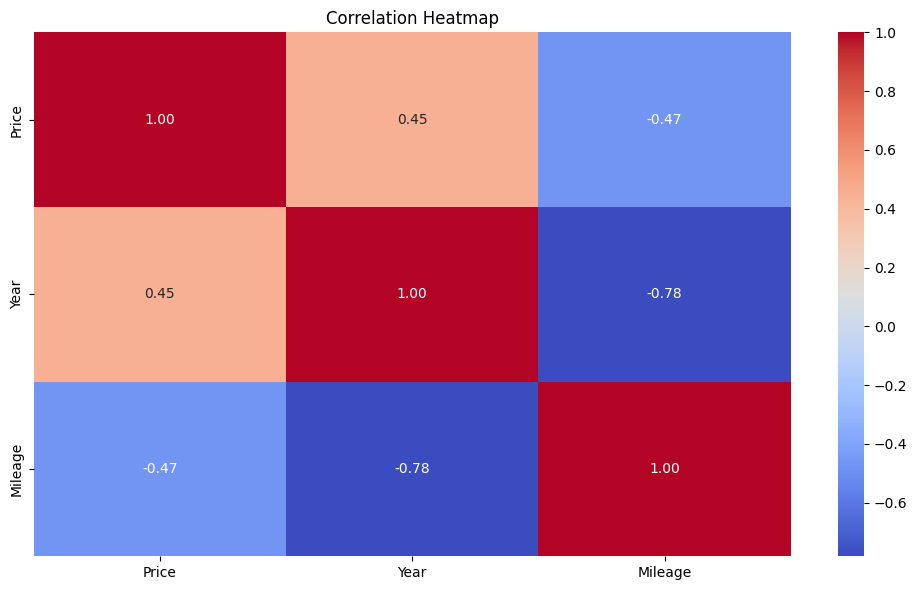

In [31]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

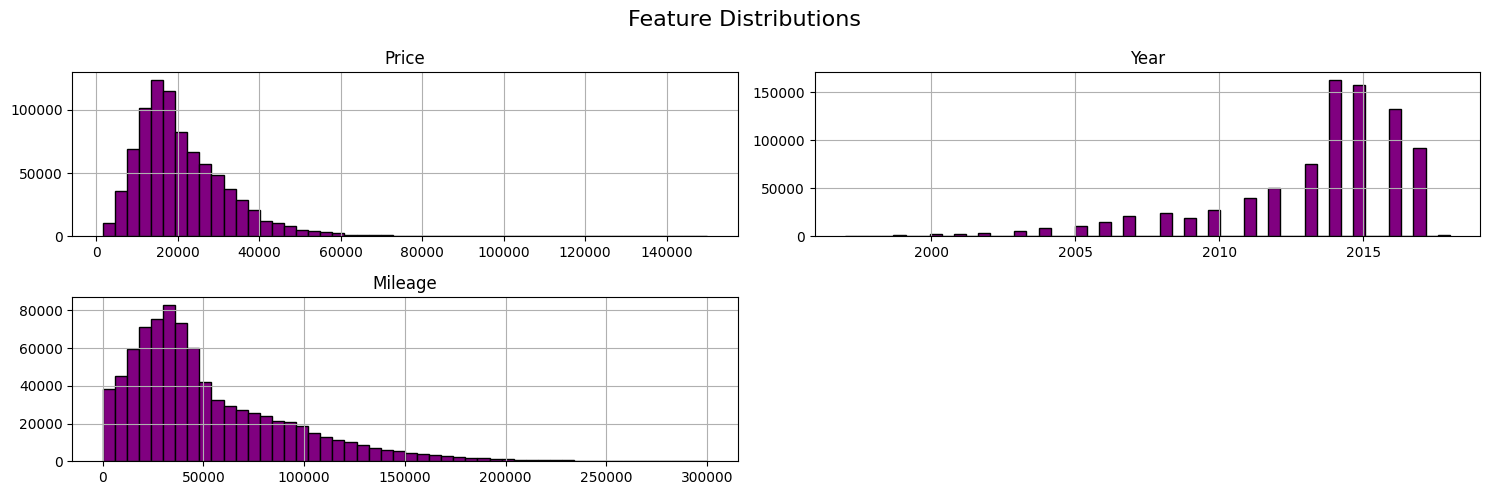

In [32]:
# Distribution of Features
df[['Price', 'Year', 'Mileage']].hist(figsize=(15, 5), bins=50, edgecolor='black', color='purple')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

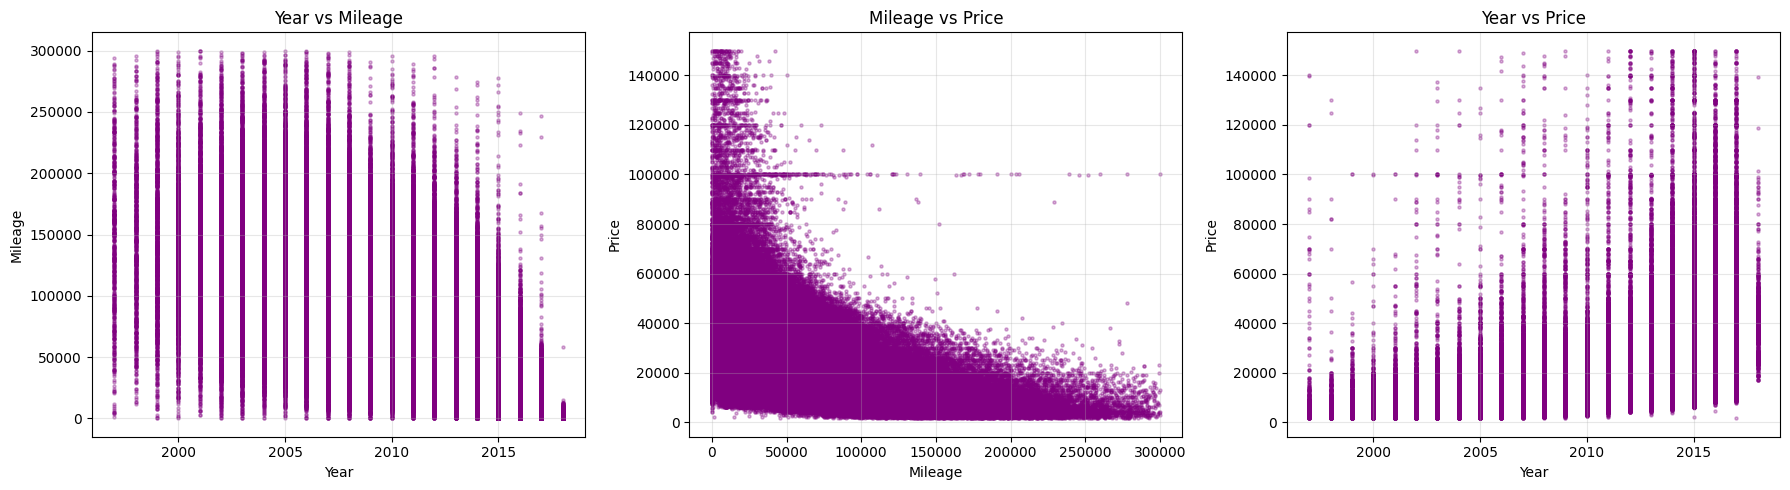

In [33]:
# Scatter Plots: Key Relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(df['Year'], df['Mileage'], alpha=0.3, color='purple', s=5)
axes[0].set_title('Year vs Mileage')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mileage')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df['Mileage'], df['Price'], alpha=0.3, color='purple', s=5)
axes[1].set_title('Mileage vs Price')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('Price')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(df['Year'], df['Price'], alpha=0.3, color='purple', s=5)
axes[2].set_title('Year vs Price')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Price')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Feature Engineering & Model Preparation

In [34]:
# Create Car_Age feature and encode categorical variables
df['Car_Age'] = 2025 - df['Year']

# Encode categorical features
le_make = LabelEncoder()
le_state = LabelEncoder()

df['Make_Encoded'] = le_make.fit_transform(df['Make'])
df['State_Encoded'] = le_state.fit_transform(df['State'])

# Model frequency encoding (popularity)
model_freq = df['Model'].value_counts(normalize=True)
df['Model_Frequency'] = df['Model'].map(model_freq)

print(f"✓ Created Car_Age feature")
print(f"✓ Encoded {df['Make'].nunique()} car makes")
print(f"✓ Encoded {df['State'].nunique()} states")
print(f"✓ Encoded model popularity")

✓ Created Car_Age feature
✓ Encoded 58 car makes
✓ Encoded 59 states
✓ Encoded model popularity


## Train Linear Regression Model

In [35]:
# Prepare features and target
features = ['Mileage', 'Year', 'Car_Age', 'Make_Encoded', 'State_Encoded', 'Model_Frequency']
X = df[features]
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(f"✓ Model trained on {X_train.shape[0]:,} samples")
print(f"✓ Testing on {X_test.shape[0]:,} samples")

✓ Model trained on 680,832 samples
✓ Testing on 170,208 samples


## Model Evaluation

In [36]:
# Calculate metrics
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

print("=== MODEL PERFORMANCE ===")
print(f"R² Score: {r2_test:.4f} ({r2_test*100:.2f}%)")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"MAE: ${mae_test:,.2f}")

# Feature importance
print("\n=== FEATURE IMPORTANCE ===")
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for _, row in coef_df.iterrows():
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{row['Feature']:20s}: {impact} price by ${abs(row['Coefficient']):,.2f}")

=== MODEL PERFORMANCE ===
R² Score: 0.2469 (24.69%)
RMSE: $10,564.26
MAE: $7,486.63

=== FEATURE IMPORTANCE ===
Mileage             : decreases price by $3,879.93
Year                : increases price by $1,189.69
Car_Age             : decreases price by $1,189.69
Model_Frequency     : increases price by $941.40
Make_Encoded        : decreases price by $851.66
State_Encoded       : increases price by $446.24


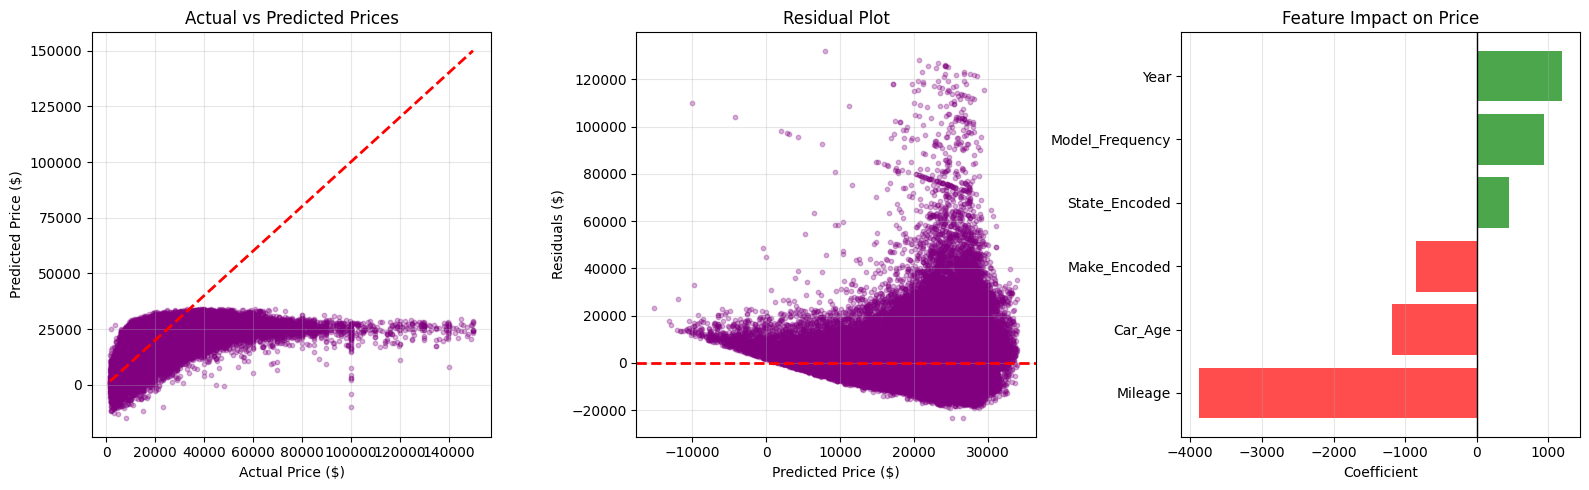

In [37]:
# Visualize Results
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Actual vs Predicted
axes[0].scatter(y_test, y_test_pred, alpha=0.3, color='purple', s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title('Actual vs Predicted Prices')
axes[0].grid(True, alpha=0.3)

# Residuals
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.3, color='purple', s=10)
axes[1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price ($)')
axes[1].set_ylabel('Residuals ($)')
axes[1].set_title('Residual Plot')
axes[1].grid(True, alpha=0.3)

# Feature Importance
coef_sorted = coef_df.sort_values('Coefficient')
colors = ['green' if x > 0 else 'red' for x in coef_sorted['Coefficient']]
axes[2].barh(coef_sorted['Feature'], coef_sorted['Coefficient'], color=colors, alpha=0.7)
axes[2].axvline(x=0, color='black', lw=1)
axes[2].set_xlabel('Coefficient')
axes[2].set_title('Feature Impact on Price')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## Summary & Conclusions

In [38]:
# Summary Report
print("=" * 70)
print("PREDIKSI HARGA MOBIL BEKAS - LINEAR REGRESSION MODEL")
print("=" * 70)

print(f"\n📊 DATASET: {len(df):,} used cars")
print(f"   Price Range: ${df['Price'].min():,} - ${df['Price'].max():,}")
print(f"   Year Range: {df['Year'].min()} - {df['Year'].max()}")

print(f"\n🎯 MODEL PERFORMANCE:")
print(f"   R² Score: {r2_test*100:.2f}% (explains variance in prices)")
print(f"   Average Error: ${mae_test:,.2f}")

print(f"\n🔍 KEY FINDINGS:")
print(f"   1. MILEAGE has the biggest impact on price")
print(f"      → Higher mileage = Lower price")
print(f"   2. NEWER CARS (higher year) = Higher price")
print(f"   3. CAR AGE negatively affects price")
print(f"   4. Popular models tend to have higher prices")

print(f"\n💡 RECOMMENDATIONS:")
print(f"   FOR SELLERS: Keep mileage low, sell newer cars")
print(f"   FOR BUYERS: Negotiate on high-mileage vehicles")

print("=" * 70)

PREDIKSI HARGA MOBIL BEKAS - LINEAR REGRESSION MODEL

📊 DATASET: 851,040 used cars
   Price Range: $1,500 - $150,000
   Year Range: 1997 - 2018

🎯 MODEL PERFORMANCE:
   R² Score: 24.69% (explains variance in prices)
   Average Error: $7,486.63

🔍 KEY FINDINGS:
   1. MILEAGE has the biggest impact on price
      → Higher mileage = Lower price
   2. NEWER CARS (higher year) = Higher price
   3. CAR AGE negatively affects price
   4. Popular models tend to have higher prices

💡 RECOMMENDATIONS:
   FOR SELLERS: Keep mileage low, sell newer cars
   FOR BUYERS: Negotiate on high-mileage vehicles
